In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [32]:
import statsmodels.api as sm
import itertools
import warnings


plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [51]:
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20171201&end="+time.strftime("%Y%m%d"))[0]
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
#bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')

In [52]:
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-14,8599.92,9518.54,8599.92,9494.63,7909820000,145023000000
1,2018-02-13,8926.72,8958.47,8455.41,8598.31,5696720000,150516000000
2,2018-02-12,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000
3,2018-02-11,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000
4,2018-02-10,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000


In [53]:
bitcoin_close_price = bitcoin_market_info[['Date', 'Close']]
bitcoin_close_price.head()

,Date,Close
0,2018-02-14,9494.63
1,2018-02-13,8598.31
2,2018-02-12,8926.57
3,2018-02-11,8129.97
4,2018-02-10,8621.90


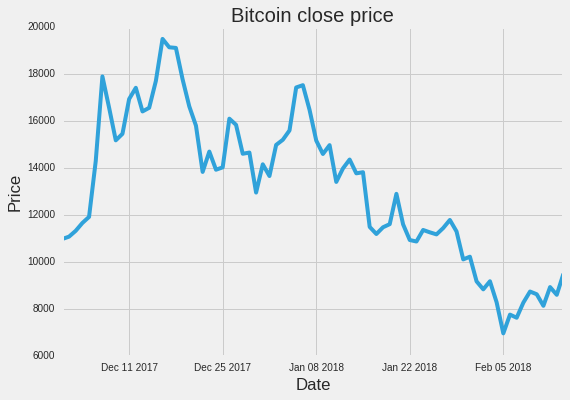

In [54]:
plt.plot(bitcoin_close_price['Date'].astype(datetime.datetime),bitcoin_close_price['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin close price')
plt.show()

In [92]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [93]:
y = np.array(bitcoin_close_price['Close'][::-1])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1323.9792801133447
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:960.3400995612282
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1212.1160852049024
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1187.7993637026084
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:978.3696501945216
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:945.1554310541844
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1569.1927624191883
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1305.9552916633436
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1139.1306435764625
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:898.2189563673599
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1157.3952793586377
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1113.8127080819427
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:932.1370686888047
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:908.0828035590235
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1026.2988602652783
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:849.3802523864008
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1042.6977820531024
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1027.8110275857848

In [94]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8228      0.074     11.187      0.000       0.679       0.967
ma.L1         -1.0014      0.220     -4.557      0.000      -1.432      -0.571
ar.S.L12      -0.0524      0.165     -0.318      0.750      -0.375       0.270
ma.S.L12      -0.7163      0.263     -2.729      0.006      -1.231      -0.202
sigma2      1.032e+06   2.08e-07   4.95e+12      0.000    1.03e+06    1.03e+06


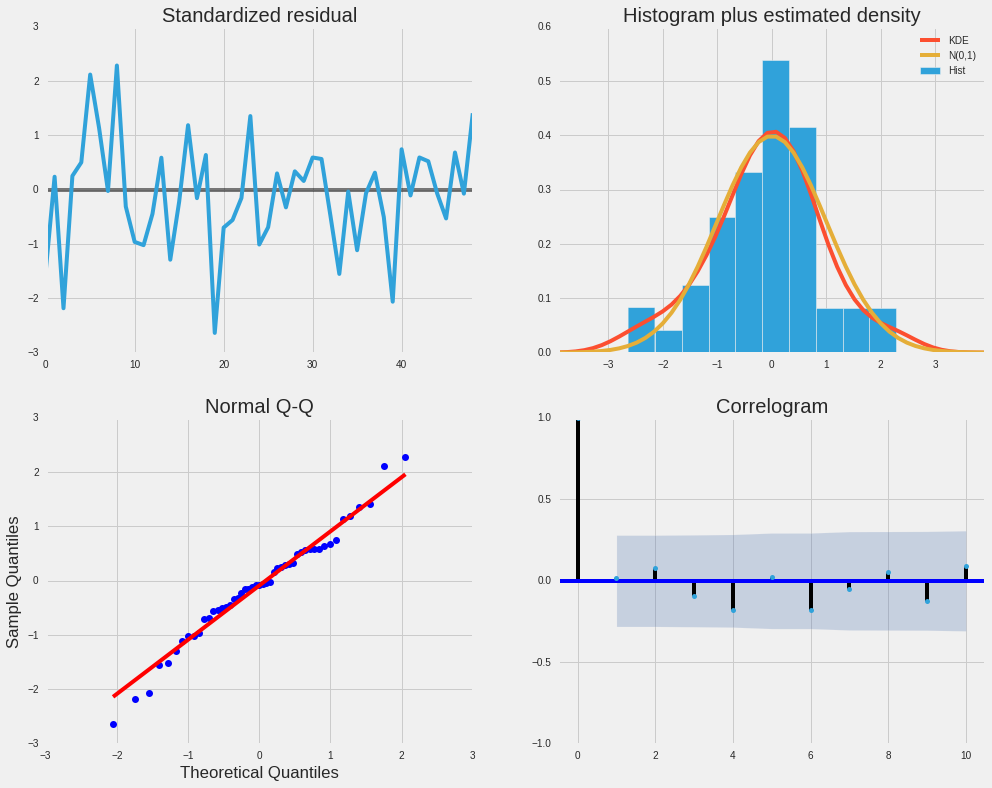

In [95]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [120]:
pred = results.get_prediction(start=66, dynamic=False)
pred_ci = pred.conf_int()

In [127]:
datas = bitcoin_close_price['Date'][::-1]

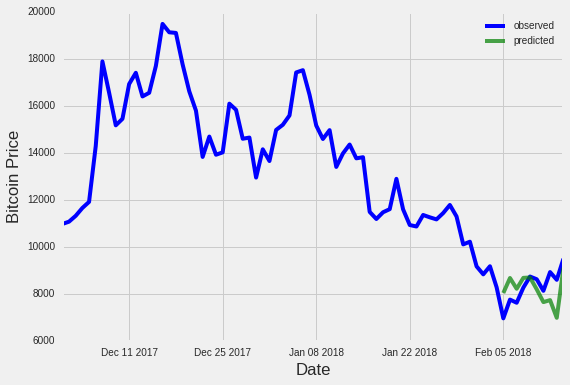

In [121]:
preds = pred.predicted_mean

plt.plot(datas.astype(datetime.datetime),y,label='observed', color='b')
plt.plot(bitcoin_close_price['Date'].astype(datetime.datetime)[:10], preds, label='predicted', color='g', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()

plt.show()

In [122]:
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

In [166]:
new_datas = ['15FEB2018', '16FEB2018', '17FEB2018', '18FEB2018', '19FEB2018']
new_datas = [datetime.datetime.strptime(date, "%d%b%Y") for date in new_datas]

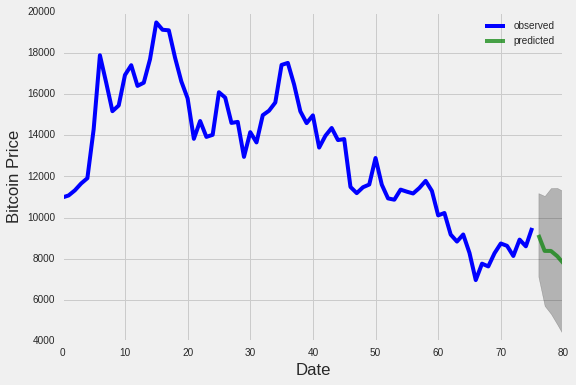

In [183]:
pred_forec = pred_uc.predicted_mean

plt.plot(range(len(y)),y,label='observed', color='b')
plt.plot(range(len(y), len(y) + len(pred_forec)), pred_forec, label='predicted', color='g', alpha=0.7)
plt.fill_between(range(len(y), len(y) + len(pred_forec)),
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')

plt.legend()
plt.show()

In [182]:
pred_forec

array([ 9155.73713576,  8376.27635652,  8374.07197974,  8122.55630929,
        7773.43121746])